### Using Gaussian Process to learn Drag coeff vs Re for small Re

In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

In [2]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
# Preview the kernel's parameters
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


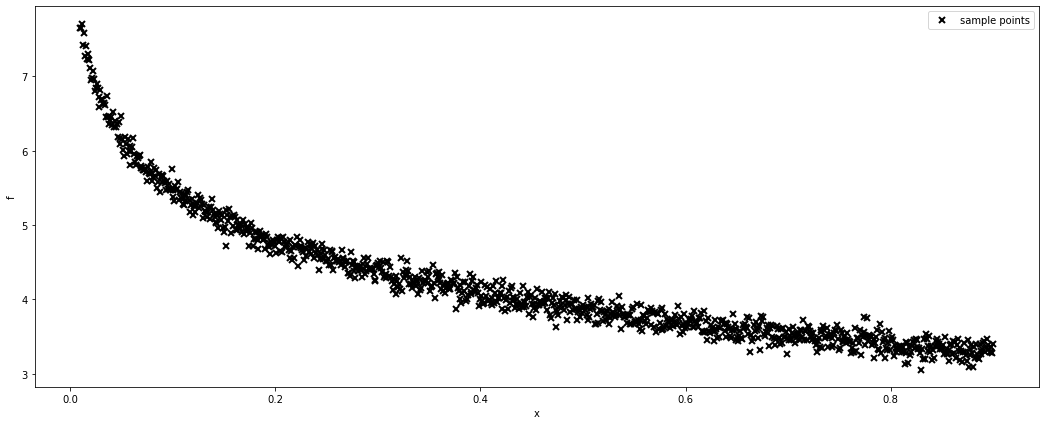

In [3]:
# lambda function, call f(x) to generate data
f = lambda x: np.log(24/x)

# 10 equally spaced sample locations 
X = np.linspace(0.01, 0.9, 1000)[:,None]

# y = f(X) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (1000,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

# Setup our figure environment
plt.figure(figsize=(18, 7))

# Plot observations
plt.plot(X, Y, "kx", mew=2)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

In [4]:
k = GPy.kern.RBF(1, variance=1., lengthscale=0.1, name="rbf")

In [5]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

In [7]:
m = GPy.models.GPRegression(X, Y, k)
m 


GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,0.1,+ve,
Gaussian_noise.variance,1.0,+ve,


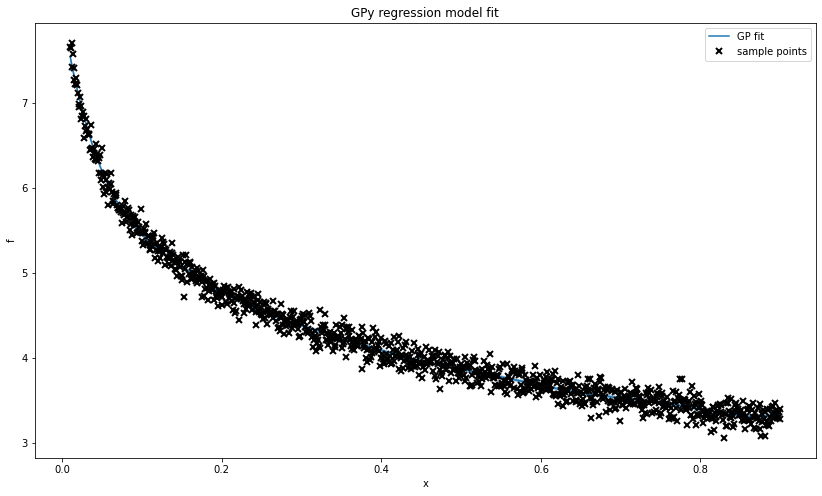

In [16]:
# New test points to sample function from
Xnew = np.linspace(0.01, 0.9, 1000)[:, None]

# Use GPy model to calculate the mean and covariance of the fit at Xnew
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.title("GPy regression model fit");

In [17]:
m.optimize()
m

GP_regression.,value,constraints,priors
rbf.variance,183.03112042827806,+ve,
rbf.lengthscale,0.18485192646444398,+ve,
Gaussian_noise.variance,0.010062644563377684,+ve,


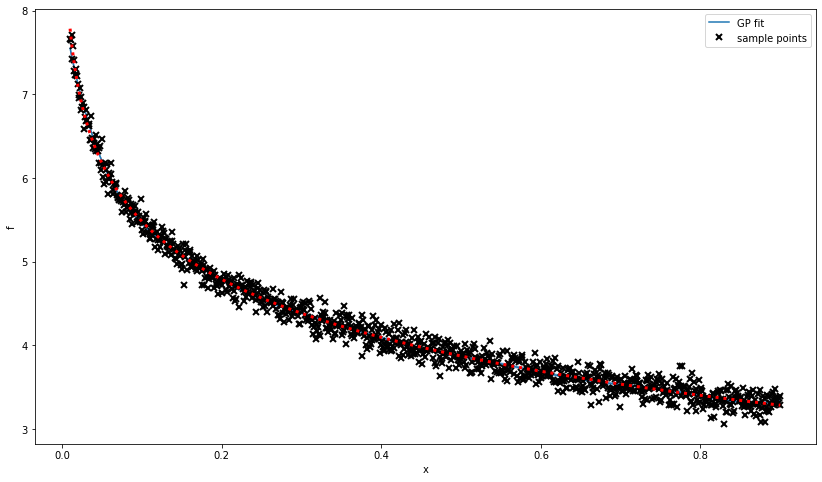

In [18]:
# Get mean and covariance of optimised GP
mean, Cov = m.predict_noiseless(Xnew, full_cov=True)

# Setup the figure environment
plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(Xnew, mean, Cov, training_points=(X,Y))
plt.plot(Xnew, f(Xnew), "r:", lw=3)

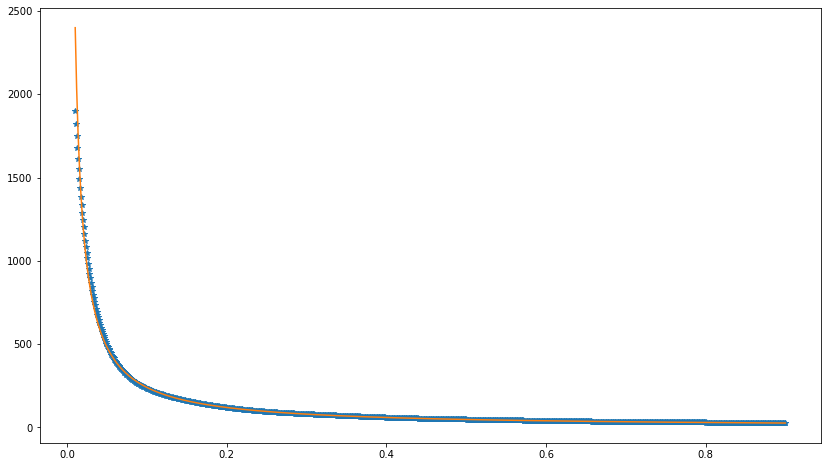

In [19]:
# Setup the figure environment
plt.figure(figsize=(14, 8))
plt.plot(Xnew, np.exp(mean), '*')
plt.plot(Xnew, np.exp(f(Xnew)))